In [5]:
from numpy import loadtxt
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import pandas as pd
import os
import seaborn as sns
import matplotlib.patches as mpatches

In [6]:
# Import saved reasults for plotting

# Load reasults
zero = np.load("./reasults/RF_experement_reasults_0.npy")
one = np.load("./reasults/RF_experement_reasults_1.npy")
two = np.load("./reasults/RF_experement_reasults_2.npy")
three = np.load("./reasults/RF_experement_reasults_3.npy")
four = np.load("./reasults/RF_experement_reasults_0.npy")

accs = np.mean(np.array([zero,one,two,three,four]),axis = 0)*100
stds = np.std(np.array([zero,one,two,three,four]),axis = 0)*100

stds.shape

(3, 6)

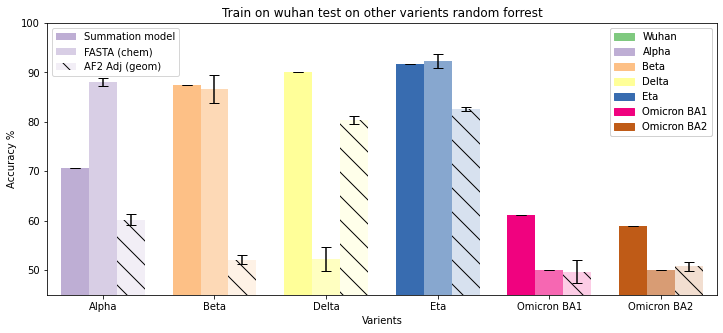

In [12]:

# Process to vectors

colors = cm.get_cmap('Accent')
fig = plt.figure(figsize=(12, 5))
# create data
width = 0.3
x = np.arange(6)*1.2

alpha = 0.9
# plot data in grouped manner of bar type

FASTA = accs[0,:]
ADJ = accs[1,:]
baseline_accs = accs[2,:]

FASTA_err = stds[0,:]
ADJ_err = stds[1,:]
baseline_err = stds[2,:]


for i in range(6):
    plt.bar(x[i]-0.3, np.array(baseline_accs)[i], width,yerr=baseline_err[i],ecolor='black', capsize=5, color=colors(i+1),alpha=1)
    plt.bar(x[i], np.array(FASTA)[i], width, yerr=FASTA_err[i],ecolor='black', capsize=5, color=colors(i+1),alpha=0.6)
    plt.bar(x[i]+0.3,np.array(ADJ)[i], width,yerr=ADJ_err[i], color=colors(i+1),ecolor='black', capsize=5,alpha=0.2,hatch="\\")

plt.xticks(x,['Alpha', 'Beta', 'Delta', 'Eta','Omicron BA1','Omicron BA2'])
plt.xlabel("Varients")
plt.ylabel("Accuracy %")
plt.ylim(45,100)

legend1 = plt.legend(["Summation model","FASTA (chem)","AF2 Adj (geom)"],loc=2)
# plt.hlines(50,-0.6,6.6, color='black')
plt.xlim(-0.6,6.6)

axes = plt.gca()
axes.add_artist(legend1)

Wuhan = mpatches.Patch(color=colors(0), label='Wuhan')
alpha = mpatches.Patch(color=colors(1), label='Alpha')
beta = mpatches.Patch(color=colors(2), label='Beta')
delta = mpatches.Patch(color=colors(3), label='Delta')
eta = mpatches.Patch(color=colors(4), label='Eta')
omi1 = mpatches.Patch(color=colors(5), label='Omicron BA1')
omi2 = mpatches.Patch(color=colors(6), label='Omicron BA2')

legend2 = plt.legend(handles=[Wuhan,alpha,beta,delta,eta,omi1,omi2],loc=1)


axes.add_artist(legend2)


plt.title("Train on wuhan test on other varients random forrest")

fig.savefig("../reasults_figs/wuhan_gen.png",bbox_inches='tight',facecolor="white")
#this indicates how knowledge of wuhan environemnt in the ACE2 bidning landscape transferes to other varient clusters.. 
# boil down to real meaning...  
# plot wityh colors ofvarients in the umap space figure... and shadings for the different types.
# have with colors of varients and differnet shading type of the reasult to go next to the space..?  